# **`Exploratory Data Analysis on Uber Data Set`**

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import geopy.distance
from math import radians,cos,sin,asin,sqrt
import folium
import datetime
from folium.plugins import HeatMap
from scipy.stats import ttest_ind

After importing all the necessary libraries, **import the Uber Data Set of september 2014...**

**`Importing Uber Dataset`**

In [ ]:
data = pd.read_csv("/content/Copy of uber_nyc_data.csv")

**`Showing first 10 rows of Data Set...`**

In [ ]:
data.head(10)

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,09-01-2014 09:00,4.25,00:15:11
1,252582,7B,15,09-01-2014 18:00,10.17,00:34:05
2,252583,11,2A,09-01-2014 17:00,4.02,00:17:06
3,252584,3B,4A,09-01-2014 13:00,1.46,00:06:32
4,252585,2A,10,09-01-2014 14:00,8.31,00:26:17
5,252586,5B,4C,09-01-2014 12:00,1.04,00:08:35
6,252587,10,10,09-01-2014 14:00,1.44,00:19:36
7,252588,2A,7A,09-01-2014 03:00,5.08,00:18:17
8,252589,2B,3C,09-01-2014 11:00,1.64,00:07:29
9,252590,9,5B,09-01-2014 20:00,16.63,00:28:37


In the above, these are the dataset enter and showing upto 10 rows.

`In the below, Showing last 10 rows of Data Set...`

In [ ]:
data.tail(10)

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
1048565,21539380,11,6B,09-30-2014 22:00,4.43,00:13:48
1048566,21539387,4C,NaN,09-30-2014 22:00,15.91,00:34:19
1048567,21539389,6A,NaN,09-30-2014 22:00,17.39,00:38:51
1048568,21539404,12,10,09-30-2014 22:00,9.14,00:39:43
1048569,21539421,4C,NaN,09-30-2014 23:00,19.21,00:33:39
1048570,21539424,4C,4A,09-30-2014 21:00,1.75,00:10:56
1048571,21539434,8,5A,09-30-2014 23:00,8.86,00:21:01
1048572,21539437,2A,10,09-30-2014 21:00,5.98,00:23:36
1048573,21539446,2A,4A,09-30-2014 22:00,1.04,00:05:48
1048574,21539453,6B,6B,09-30-2014 21:00,0.00,00:03:01


In the above, these are the dataset enter and showing last 10 rows.

**`Number of rows and and columns of the data set...`**

In [ ]:
print("There are {} rows and {} columns in the dataset".format(data.shape[0],data.shape[1]))

There are 1048575 rows and 6 columns in the dataset


In [ ]:
data.shape

(1048575, 6)

**`Total number of elements in the data set is counted by below code...`**

In [ ]:
data.size

6291450

**`Length of the data set...`**

In [ ]:
len(data.id.unique())

1048575

**`In the below code gives all information about dataset...`**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1048575 non-null  int64  
 1   origin_taz       1048575 non-null  object 
 2   destination_taz  1001011 non-null  object 
 3   pickup_datetime  1048575 non-null  object 
 4   trip_distance    1048575 non-null  float64
 5   trip_duration    1048575 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 48.0+ MB


In [ ]:
No_of_cols=data.columns.nunique()
print("There are total %d columns in the data"%No_of_cols)

There are total 6 columns in the data


**`Shows the columns in the dataset...`**

In [ ]:
data.columns

Index(['id', 'origin_taz', 'destination_taz', 'pickup_datetime',
       'trip_distance', 'trip_duration'],
      dtype='object')

Here it shows that there are 6 unique columns in the dataset.

**`Description of the dataset.`**

Here shows mean,standard deviation, minimum value, maximum value, 1st quartile, 2nd and 3rd quartile...

In [ ]:
data.describe()

,id,trip_distance
count,1.048575e+06,1.048575e+06
mean,1.090906e+07,5.469342e+00
std,6.273050e+06,6.078806e+00
min,2.525810e+05,0.000000e+00
25%,5.573306e+06,1.810000e+00
50%,1.089366e+07,3.330000e+00
75%,1.621692e+07,6.720000e+00
max,2.153945e+07,3.715500e+02


**`Calculate Correlation...`**

In [ ]:
data.corr()

,id,trip_distance
id,1.000000,0.000751
trip_distance,0.000751,1.000000


**`Check the missing value...`**

In [ ]:
data.isnull().values.any()

True

Here, True means in the Dataset there having some missing values.

**`No. of missing value`**

In [ ]:
data.isnull().values.sum()

47564

Total 47564 data are missing in the Dataset.

**`In which column, how much data are missing (Column wise)....`**

In [ ]:
data.isnull().sum()

id                     0
origin_taz             0
destination_taz    47564
pickup_datetime        0
trip_distance          0
trip_duration          0
dtype: int64

**`Dropping NA values`**  i.e. creating a new DATASET **`data_ud`** where donot have any missing value

In [ ]:
data_ud = data.dropna()

**`Now, Check in the new DATASET is there any missing value...`**

In [ ]:
data_ud.isnull().values.any()

False

So, False represent in the new Data Set , There is no missing value.

**`Description of new DATASET data_ud`**

In [ ]:
data_ud.describe()

,id,trip_distance
count,1.001011e+06,1.001011e+06
mean,1.090881e+07,4.948558e+00
std,6.273819e+06,4.878441e+00
min,2.525810e+05,0.000000e+00
25%,5.573285e+06,1.750000e+00
50%,1.089350e+07,3.150000e+00
75%,1.621702e+07,6.240000e+00
max,2.153945e+07,3.715500e+02


**`Stating point : From where the Car started`**

In [ ]:
Start = data.origin_taz.unique()
Start

array(['7C', '7B', '11', '3B', '2A', '5B', '10', '2B', '9', '6B', '15',
       '4C', '5A', '8', '14', '4A', '7A', '1', '16', '3A', '2C', '6A',
       '12', '13', '3C', '4B', '5C', '17'], dtype=object)

In the above, these are the unique Starting point from where the journey started.

**`End point : Placed where journey has finished`**

In [ ]:
End = data.destination_taz.unique()
End

array(['6A', '15', '2A', '4A', '10', '4C', '7A', '3C', '5B', '14', '8',
       nan, '7C', '12', '2C', '1', '6B', '5C', '9', '3A', '2B', '11',
       '7B', '5A', '13', '4B', '18', '16', '3B', '17'], dtype=object)

In the above, these are the unique reaching point from where upto the journey end.

**`Unique End point,`** From where the journey never start.

In [ ]:
set(End) - set(Start)

{'18', nan}

There are 18 such type of place where only the Uber cab come to drop the passanger.

**`Showing the Pick-up date time...`**

In [ ]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [ ]:
data['pickup_datetime']

0         2014-09-01 09:00:00
1         2014-09-01 18:00:00
2         2014-09-01 17:00:00
3         2014-09-01 13:00:00
4         2014-09-01 14:00:00
                  ...        
1048570   2014-09-30 21:00:00
1048571   2014-09-30 23:00:00
1048572   2014-09-30 21:00:00
1048573   2014-09-30 22:00:00
1048574   2014-09-30 21:00:00
Name: pickup_datetime, Length: 1048575, dtype: datetime64[ns]

In [ ]:
#create a new column to store this new binned column
data['BinnedHour']=data['pickup_datetime'].dt.floor('15min')

In the above code, here we binned the date time that means **Convert it to a continous data set for date time in the range of 15 min**

**`Now, Showing the Date time of BinnedHour, means updated dataset...`**

In [ ]:
#printing the new column - BinnedHour
data['BinnedHour']

0         2014-09-01 09:00:00
1         2014-09-01 18:00:00
2         2014-09-01 17:00:00
3         2014-09-01 13:00:00
4         2014-09-01 14:00:00
                  ...        
1048570   2014-09-30 21:00:00
1048571   2014-09-30 23:00:00
1048572   2014-09-30 21:00:00
1048573   2014-09-30 22:00:00
1048574   2014-09-30 21:00:00
Name: BinnedHour, Length: 1048575, dtype: datetime64[ns]

# **Visualizations**

**`Barplot of Total number of Uber cab rides per day in September 2014 at NYC`**

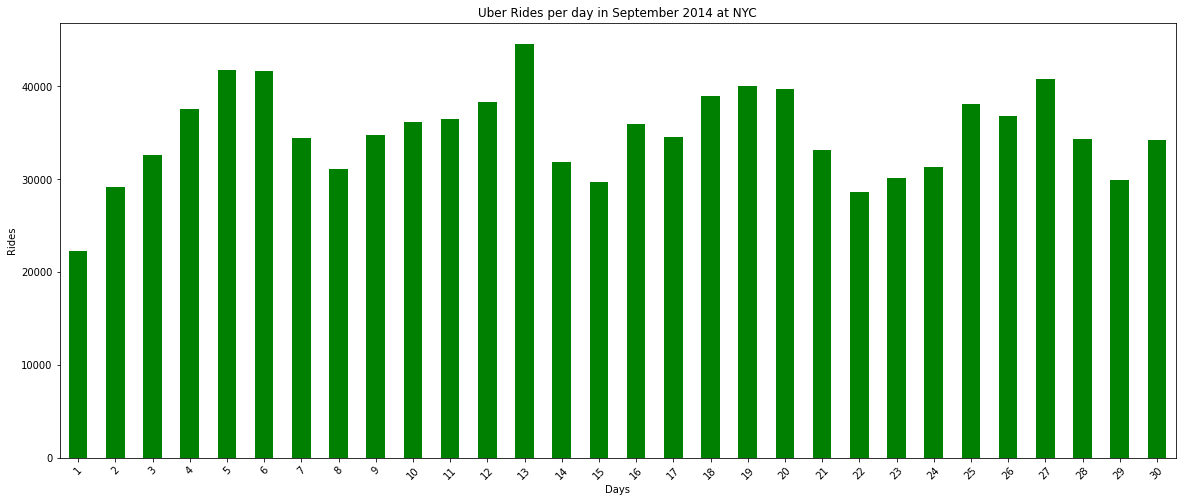

In [ ]:
plt.figure(figsize=(20,8))
data['BinnedHour'].dt.day.value_counts().sort_index().plot(kind='bar',color='green')
for item in plt.gca().get_xticklabels():
    item.set_rotation(45)
plt.title('Uber Rides per day in September 2014 at NYC')
plt.xlabel('Days')
_=plt.ylabel('Rides')

In the barplot it look like that on 13th day of sep has highest number of rides done and on 1st day of month has lowest number of rides booked.

**`Line Chart of BinnedHour Dataset of Uber rides in 15 mins of September`**

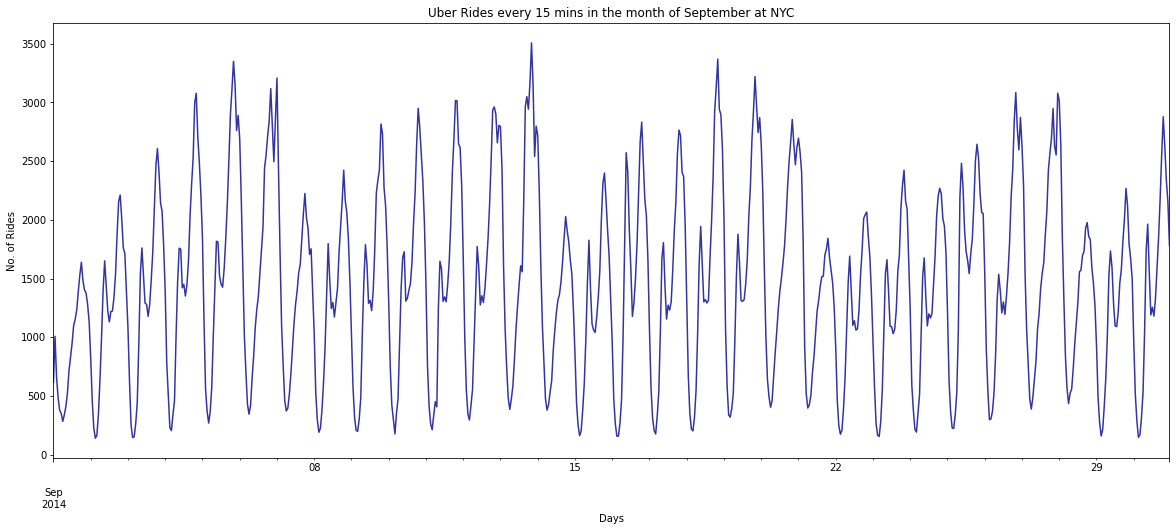

In [ ]:
plt.figure(figsize=(20,8))
data['BinnedHour'].value_counts().sort_index().plot(c='darkblue',alpha=0.8)
plt.title('Uber Rides every 15 mins in the month of September at NYC')
plt.xlabel('Days')
_=plt.ylabel('No. of Rides')

`**Number of rides in decreasing order of the BinnedHour time on the Data set**`

In [ ]:
data['BinnedHour'].value_counts()

2014-09-13 20:00:00    3507
2014-09-18 20:00:00    3368
2014-09-05 20:00:00    3350
2014-09-19 20:00:00    3221
2014-09-07 00:00:00    3208
                       ... 
2014-09-23 04:00:00     156
2014-09-03 04:00:00     153
2014-09-30 03:00:00     149
2014-09-03 03:00:00     146
2014-09-02 03:00:00     141
Name: BinnedHour, Length: 720, dtype: int64

Above output shows that on 13th sep at 08 PM maximum number of uber cab booked and the minimum number of cab book on that month on 02nd sep at 03 AM.

**`Inserting the days to their corresponing date...`**

And show the dataset with serial number and days.

In [ ]:
#defining a dictionary to map the weekday to day name
DayMap={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['Day']=data['BinnedHour'].dt.weekday.map(DayMap)
data['Day']

0           Monday
1           Monday
2           Monday
3           Monday
4           Monday
            ...   
1048570    Tuesday
1048571    Tuesday
1048572    Tuesday
1048573    Tuesday
1048574    Tuesday
Name: Day, Length: 1048575, dtype: object

**`Serial number with their corresponding date...`**, Separate date from BinnedHour

In [ ]:
#Separating the date to another column
data['Date']=data['BinnedHour'].dt.date
data['Date']

0          2014-09-01
1          2014-09-01
2          2014-09-01
3          2014-09-01
4          2014-09-01
              ...    
1048570    2014-09-30
1048571    2014-09-30
1048572    2014-09-30
1048573    2014-09-30
1048574    2014-09-30
Name: Date, Length: 1048575, dtype: object

**`Order Category of days....`**

In [ ]:
#Defining ordered category of week days for easy sorting and visualization
data['Day']=pd.Categorical(data['Day'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
data['Day']

0           Monday
1           Monday
2           Monday
3           Monday
4           Monday
            ...   
1048570    Tuesday
1048571    Tuesday
1048572    Tuesday
1048573    Tuesday
1048574    Tuesday
Name: Day, Length: 1048575, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' <
                         'Sunday']

**`Serial number with BinnedHour Time, which is separeted from BinnedHour Date Time Column`**

In [ ]:
#Separating time from the "BinnedHour" Column
data['Time']=data['BinnedHour'].dt.time
data['Time']

0          09:00:00
1          18:00:00
2          17:00:00
3          13:00:00
4          14:00:00
             ...   
1048570    21:00:00
1048571    23:00:00
1048572    21:00:00
1048573    22:00:00
1048574    21:00:00
Name: Time, Length: 1048575, dtype: object

**`Now, Show the Date, Day and number of Rides with incresing order of Time `**

In [ ]:
weekly_data = data.groupby(['Date','Day','Time']).count().dropna().rename(columns={'BinnedHour':'Rides'})['Rides'].reset_index()
weekly_data.head(20)

,Date,Day,Time,Rides
0,2014-09-01,Monday,00:00:00,618
1,2014-09-01,Monday,01:00:00,1009
2,2014-09-01,Monday,02:00:00,662
3,2014-09-01,Monday,03:00:00,486
4,2014-09-01,Monday,04:00:00,379
5,2014-09-01,Monday,05:00:00,352
6,2014-09-01,Monday,06:00:00,284
7,2014-09-01,Monday,07:00:00,340
8,2014-09-01,Monday,08:00:00,410
9,2014-09-01,Monday,09:00:00,524


**`Show the Number of Rides with corresponding days...`**

In [ ]:
#Grouping the weekly_data daywise
daywise = weekly_data.groupby('Day').sum()
daywise

,Rides
Day,
Monday,141506
Tuesday,164091
Wednesday,134483
Thursday,151130
Friday,156925
Saturday,166644
Sunday,133796


According to above chart on Saturday maximum number of uber cab has booked and on sunday has minimum.

**`Barchart of Days v/s Number of rides...`**

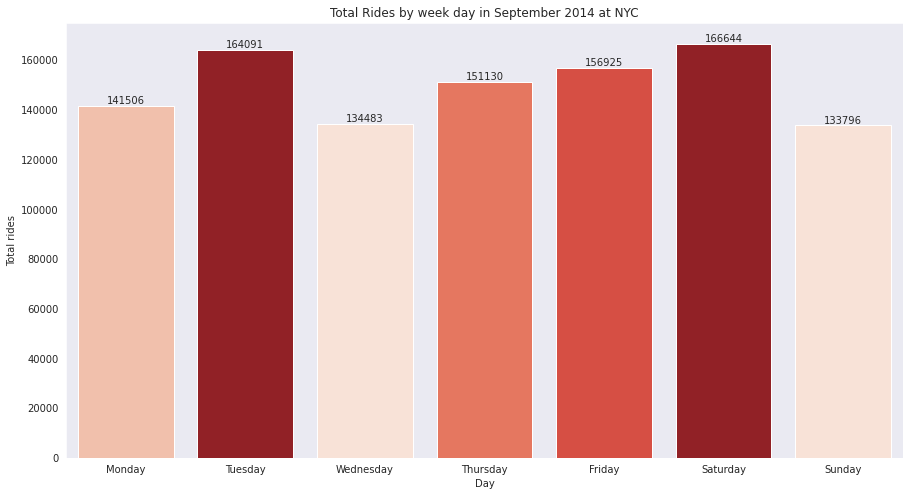

In [ ]:
#Plotting the graphs for a better visualization
sns.set_style("dark")
plt.figure(figsize=(15,8))

#Creating a customized color palette for custom hue according to height of bars
vals = daywise.to_numpy().ravel()
normalized = (vals - np.min(vals)) / (np.max(vals) - np.min(vals))
indices = np.round(normalized * (len(vals) - 1)).astype(np.int32)
palette = sns.color_palette('Reds', len(vals))
colorPal = np.array(palette).take(indices, axis=0)

#Creating a bar plot
ax=sns.barplot(x = daywise.index,y= vals,palette=colorPal)
plt.ylabel('Total rides')
plt.title('Total Rides by week day in September 2014 at NYC')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2.0,rect.get_height(),int(rect.get_height()), ha='center', va='bottom')

Here more dence colour shows maximum number of rides and as the color density decrease the number of ride decrease, then conclusion is clearly visible that in decreasing order of day...
Saturday > Tuesday > Friday > Thursday > Monday > Wednesday > Sunday

**`In the below, it shows that the average ride in that time of the day of that sep month.`**

In [ ]:
weekly_data = weekly_data.groupby(['Day','Time']).mean()['Rides']
weekly_data.head(200)

Day     Time    
Monday  00:00:00    144.900000
        01:00:00     97.800000
        02:00:00     57.800000
        03:00:00     39.200000
        04:00:00     41.033333
                       ...    
Sunday  19:00:00    254.233333
        20:00:00    241.866667
        21:00:00    217.533333
        22:00:00    207.400000
        23:00:00    172.266667
Name: Rides, Length: 168, dtype: float64

for example in september month there 4 or 5 monday, then select a time 00:00:00 - on that time the average ride of 4 or 5 monday is 144.900000.

**`Show every hour average time for all the days`**

In [ ]:
#Unstacking the data to create heatmap
weekly_data= weekly_data.unstack(level=0)
weekly_data

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
00:00:00,144.900000,158.433333,155.466667,178.533333,236.500000,358.533333,387.966667
01:00:00,97.800000,86.333333,84.500000,94.700000,137.000000,304.933333,329.566667
02:00:00,57.800000,45.466667,45.800000,54.633333,75.000000,210.266667,252.433333
03:00:00,39.200000,27.366667,29.033333,31.433333,45.233333,138.266667,177.900000
04:00:00,41.033333,28.433333,23.333333,28.200000,39.700000,95.233333,110.266667
05:00:00,64.100000,51.033333,43.300000,44.733333,51.833333,62.766667,67.433333
06:00:00,93.733333,89.533333,65.733333,66.400000,73.066667,50.900000,52.933333
07:00:00,143.733333,172.033333,132.300000,116.933333,126.633333,61.500000,59.200000
08:00:00,207.866667,265.766667,204.933333,218.166667,187.666667,84.833333,70.733333


**`Plotting a heatmap for the above data...`**

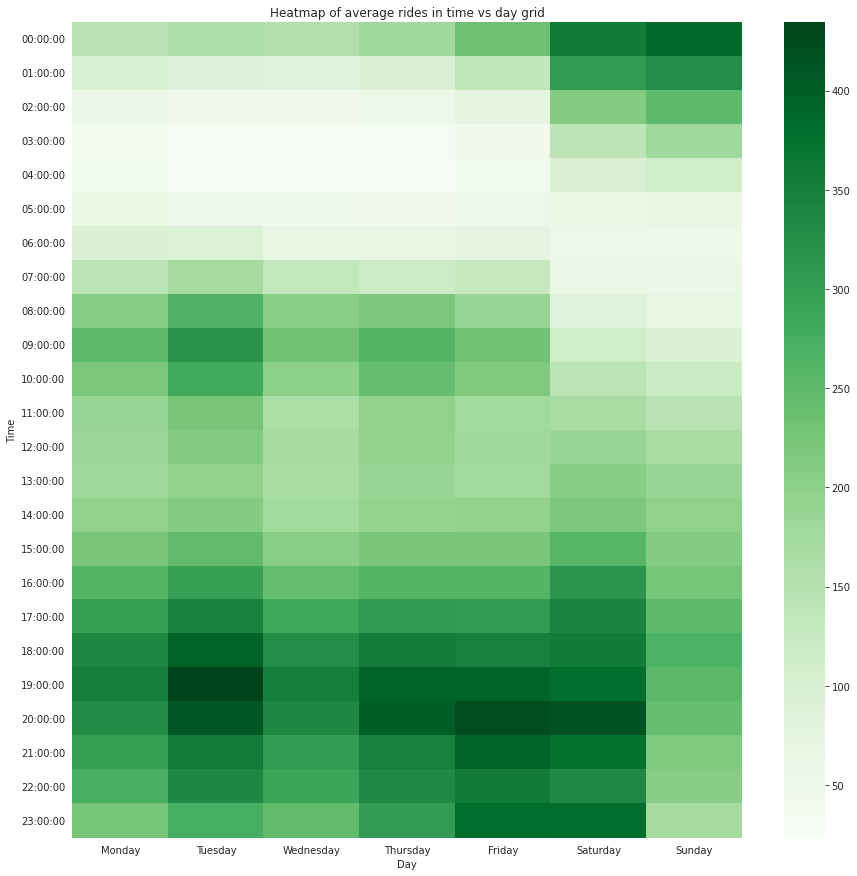

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(weekly_data,cmap='Greens')
_=plt.title('Heatmap of average rides in time vs day grid')

More dence green color shows the highest average number rides and the decreasing the colour density shows that decreasing the average of number of rides.

**`The Line Chart shows that Average rides per day vs time...`**

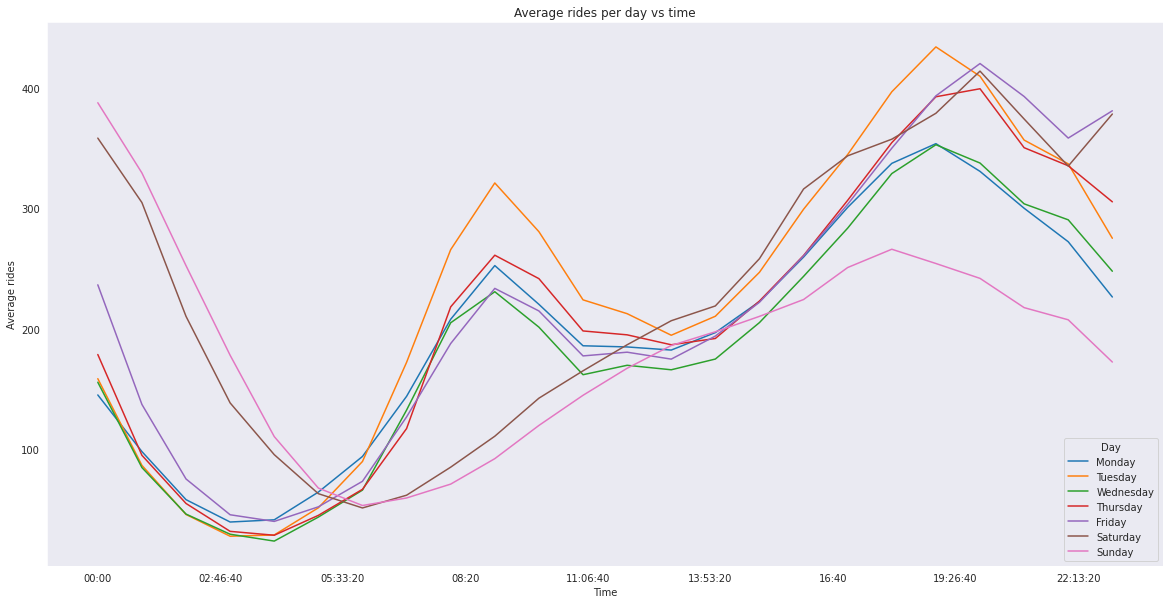

In [ ]:
plt.figure(figsize=(20,10))
weekly_data.plot(ax=plt.gca())
_=plt.title('Average rides per day vs time')
_=plt.ylabel('Average rides')
plt.locator_params(axis='x', nbins=10)

Here Seven line shows 7 different days, it's show that from Monday to friday almost curve is same but saturday and sunday curve are different.

**`Line Chart of Average Uber rides on Average of seven days on that time...`**(Average of seven line of the above chart)

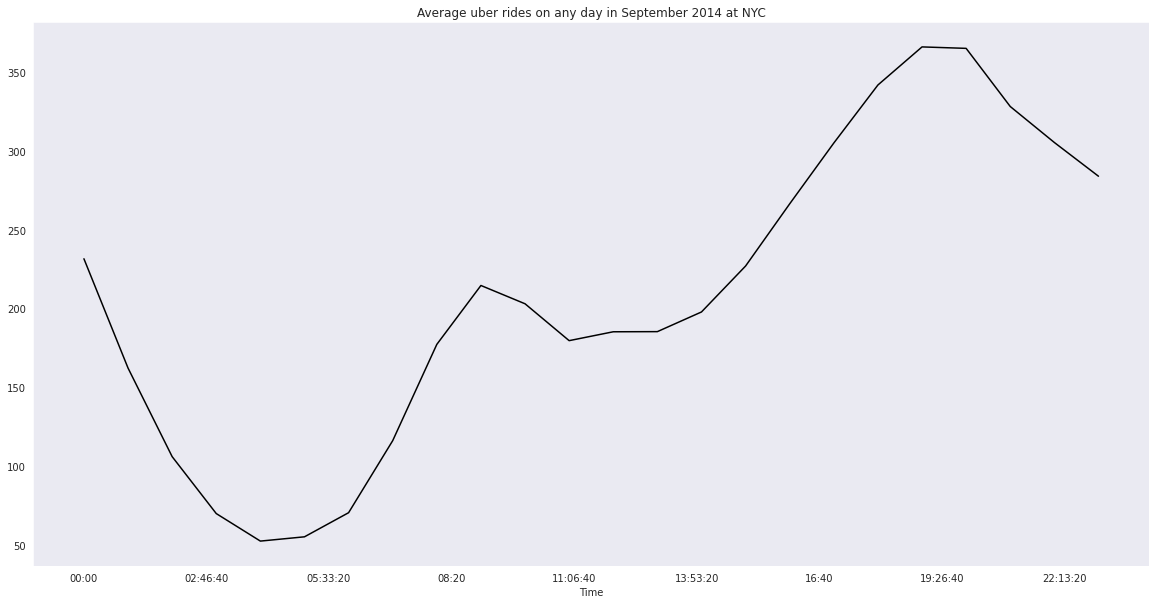

In [ ]:
plt.figure(figsize=(20,10))
weekly_data.T.mean().plot(c = 'black')
_=plt.title('Average uber rides on any day in September 2014 at NYC')
plt.locator_params(axis='x', nbins=10)

Here the Line Chart shows that in the time between 07:00-09:00 PM the maximum number of uber cab has booked.

**`Count the number of Pick-up Location...`**

In [ ]:
data['origin_taz'].value_counts()

2A    200551
4C     72480
1      71662
6B     62676
5C     58896
15     54456
10     49726
11     49604
4A     44906
6A     44601
2B     37583
5A     32433
4B     31840
9      25284
14     23501
2C     23091
8      22306
7C     21853
5B     20804
12     18716
7A     16324
7B     14999
3A     14092
3C     13082
16     10567
3B      8835
13      3368
17       339
Name: origin_taz, dtype: int64

Here it shows that from 2A maximum number of trip started and from 17 least number of trip.

**`Count the number of dropping location`**

In [ ]:
data['destination_taz'].value_counts()

2A    173210
4C     66884
1      62254
6B     59611
15     57370
10     49930
5C     49192
11     46237
4A     45302
6A     42378
8      34633
2B     34631
9      31575
5A     28509
14     25252
4B     23664
7C     22445
2C     20028
5B     19697
12     17894
7B     16432
7A     15292
3A     13947
3C     11081
16     11053
18     10853
3B      7421
13      3239
17       997
Name: destination_taz, dtype: int64

Here it shows that maximum number of dropped on 2A and least number of dropped on 17.

**`Chart to show the number of origin_taz(Pickup Location) and destination-taz(droping Location)`**

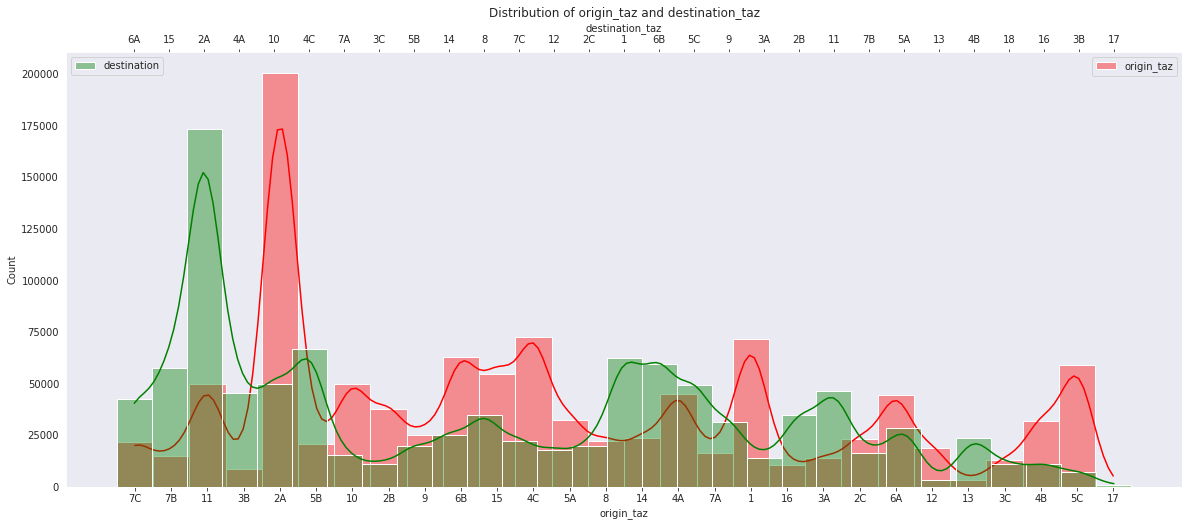

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data['origin_taz'], bins='auto',kde=True,color='r',alpha=0.4,label = 'origin_taz')
plt.legend(loc='upper right')
plt.xlabel('origin_taz')
plt.twiny()
sns.histplot(data['destination_taz'], bins='auto',kde=True,color='g',alpha=0.4,label = 'destination')
_=plt.legend(loc='upper left')
_=plt.xlabel('destination_taz')
_=plt.title('Distribution of origin_taz and destination_taz')

**`Number of average trip on weekend i.e. saturday and sunday on every hour`**

In [ ]:
weekends = weekly_data[['Saturday','Sunday']]
weekends.head(5)

Day,Saturday,Sunday
Time,,
00:00:00,358.533333,387.966667
01:00:00,304.933333,329.566667
02:00:00,210.266667,252.433333
03:00:00,138.266667,177.900000
04:00:00,95.233333,110.266667


**`Number of average trip on weekdays i.e. from Monday to Friday on every hour`**

In [ ]:
weekdays = weekly_data.drop(['Saturday','Sunday'],axis=1)
weekdays.head(5)

Day,Monday,Tuesday,Wednesday,Thursday,Friday
Time,,,,,
00:00:00,144.900000,158.433333,155.466667,178.533333,236.500000
01:00:00,97.800000,86.333333,84.500000,94.700000,137.000000
02:00:00,57.800000,45.466667,45.800000,54.633333,75.000000
03:00:00,39.200000,27.366667,29.033333,31.433333,45.233333
04:00:00,41.033333,28.433333,23.333333,28.200000,39.700000


**`Average trip of weekends(Saturday and Sunday) and average trip of weekdays(Monday-Friday)`**

In [ ]:
weekends = weekends.mean(axis=1)
weekdays = weekdays.mean(axis=1)

In [ ]:
weekends.head(5)

Time
00:00:00    373.250000
01:00:00    317.250000
02:00:00    231.350000
03:00:00    158.083333
04:00:00    102.750000
dtype: float64

In [ ]:
weekdays.head(5)

Time
00:00:00    174.766667
01:00:00    100.066667
02:00:00     55.740000
03:00:00     34.453333
04:00:00     32.140000
dtype: float64

**`Show in a table where both average weekdays and weekends...`**

In [ ]:
weekdays_weekends = pd.concat([weekdays,weekends],axis=1)
weekdays_weekends.columns = ['Weekdays','Weekends']

In [ ]:
weekdays_weekends.head(10)

,Weekdays,Weekends
Time,,
00:00:00,174.766667,373.250000
01:00:00,100.066667,317.250000
02:00:00,55.740000,231.350000
03:00:00,34.453333,158.083333
04:00:00,32.140000,102.750000
05:00:00,51.000000,65.100000
06:00:00,77.693333,51.916667
07:00:00,138.326667,60.350000
08:00:00,216.880000,77.783333


**`Draw the trip of average weekdays, average weekends and average average weekly trip on every hour in a Line Chart...`**

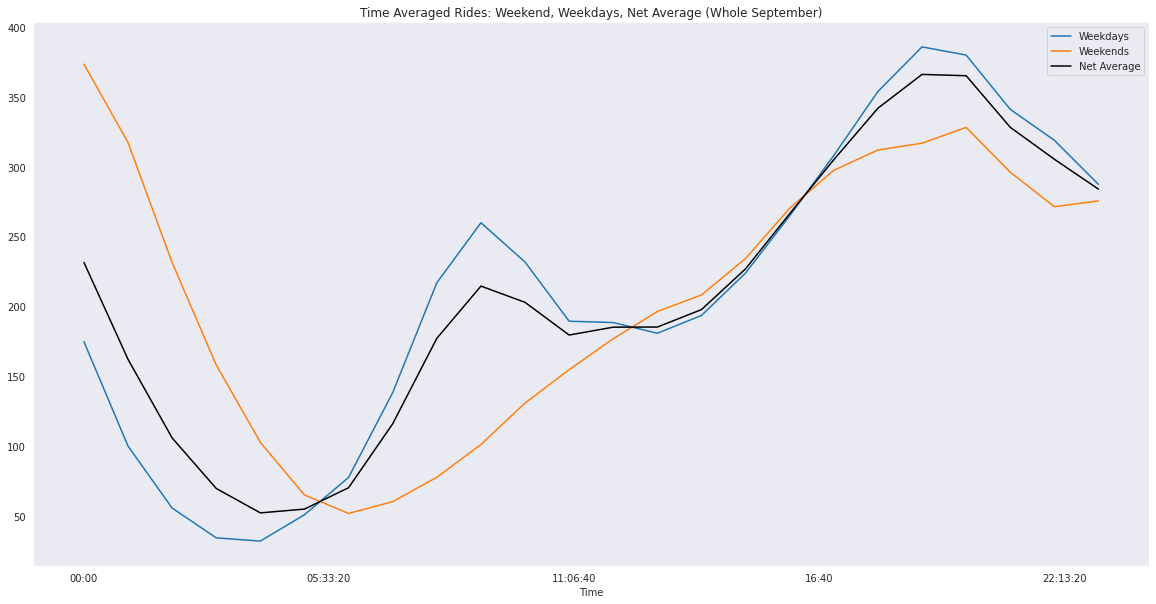

In [ ]:
plt.figure(figsize=(20,10))
weekdays_weekends.plot(ax=plt.gca())
weekly_data.T.mean().plot(ax=plt.gca(),c = 'black',label='Net Average')
_=plt.title('Time Averaged Rides: Weekend, Weekdays, Net Average (Whole September)')
_=plt.legend()

**`The Normalized Line Chart of Weekdays and Weekends...`**

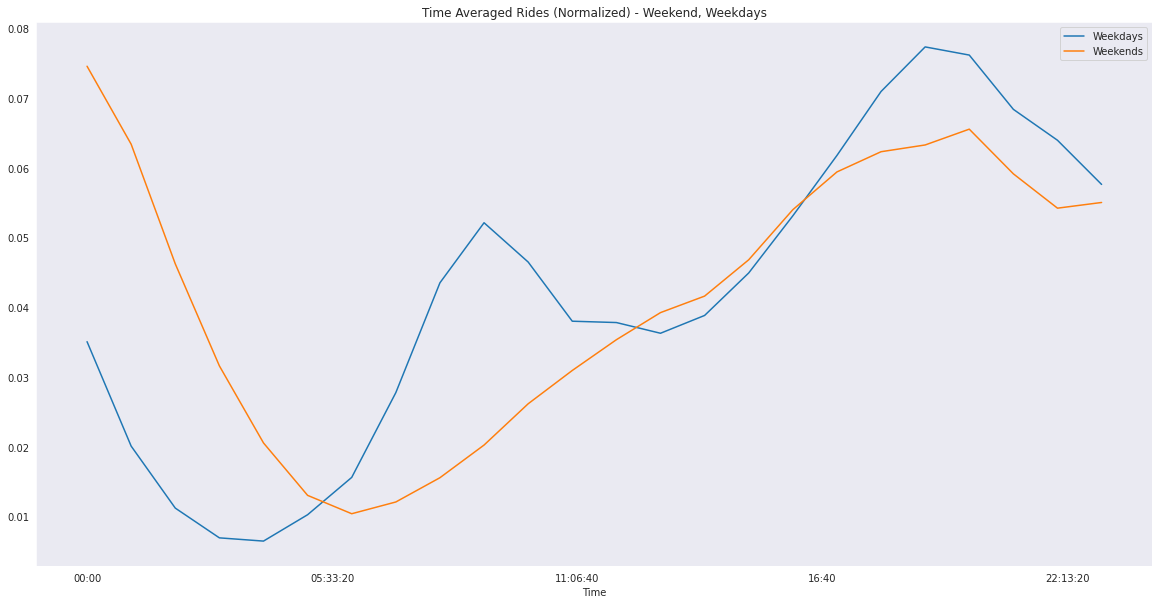

In [ ]:
plt.figure(figsize=(20,10))
(weekdays_weekends/weekdays_weekends.sum()).plot(ax=plt.gca())
_=plt.title('Time Averaged Rides (Normalized) - Weekend, Weekdays')

# **`Statistical Test`**

**`Grouping the Data...`**

In [ ]:
#Grouping by date and time and creating a dataset that gives the total rides every 15 mins
for_ttest = data.groupby(['Date','Time']).count()['Day'].reset_index(level=1)
for_ttest

,Time,Day
Date,,
2014-09-01,00:00:00,618
2014-09-01,01:00:00,1009
2014-09-01,02:00:00,662
2014-09-01,03:00:00,486
2014-09-01,04:00:00,379
...,...,...
2014-09-30,19:00:00,2878
2014-09-30,20:00:00,2626
2014-09-30,21:00:00,2337


**`Count the total ride for each day`**

In [ ]:
#Total rides on each day in september
data.groupby(['Date']).count()['Day']

Date
2014-09-01    22276
2014-09-02    29133
2014-09-03    32554
2014-09-04    37565
2014-09-05    41805
2014-09-06    41604
2014-09-07    34451
2014-09-08    31053
2014-09-09    34708
2014-09-10    36136
2014-09-11    36483
2014-09-12    38290
2014-09-13    44603
2014-09-14    31885
2014-09-15    29696
2014-09-16    35956
2014-09-17    34524
2014-09-18    38965
2014-09-19    40023
2014-09-20    39664
2014-09-21    33132
2014-09-22    28562
2014-09-23    30122
2014-09-24    31269
2014-09-25    38117
2014-09-26    36807
2014-09-27    40773
2014-09-28    34328
2014-09-29    29919
2014-09-30    34172
Name: Day, dtype: int64

**`Normalizing the dataset by dividing rides in each time slot on a day by total number of rides on that day`**

In [ ]:
#Normalizing the dataset by dividing rides in each time slot on a day by total number of rides on that day
for_ttest = pd.concat([for_ttest['Day']/data.groupby(['Date']).count()['Day'],for_ttest['Time']],axis=1)

In [ ]:
#renaming
for_ttest=for_ttest.rename(columns={'Day':'NormalizedRides'})

In [ ]:
for_ttest

,NormalizedRides,Time
Date,,
2014-09-01,0.027743,00:00:00
2014-09-01,0.045295,01:00:00
2014-09-01,0.029718,02:00:00
2014-09-01,0.021817,03:00:00
2014-09-01,0.017014,04:00:00
...,...,...
2014-09-30,0.084221,19:00:00
2014-09-30,0.076847,20:00:00
2014-09-30,0.068389,21:00:00


In [ ]:
for_ttest = pd.concat([for_ttest,pd.to_datetime(for_ttest.reset_index()['Date']).dt.day_name().to_frame().set_index(for_ttest.index).rename(columns={'Date':'Day'})],axis=1)

In [ ]:
for_ttest

,NormalizedRides,Time,Day
Date,,,
2014-09-01,0.027743,00:00:00,Monday
2014-09-01,0.045295,01:00:00,Monday
2014-09-01,0.029718,02:00:00,Monday
2014-09-01,0.021817,03:00:00,Monday
2014-09-01,0.017014,04:00:00,Monday
...,...,...,...
2014-09-30,0.084221,19:00:00,Tuesday
2014-09-30,0.076847,20:00:00,Tuesday
2014-09-30,0.068389,21:00:00,Tuesday


**`The value of t-statistic and p-value`**

Null hypothesis, H0 : There is no significant difference between the two groups, Mean of two groups are equal i.e. u1=u2

Alternative Hypothesis, H1 : Mean of two groups arenot equal.

In [ ]:
ttestvals = for_ttest.groupby('Time').apply(lambda x: ttest_ind(x[x['Day']<'Saturday']['NormalizedRides'],x[x['Day']>='Saturday']['NormalizedRides']))
ttestvals
# Perform the two sample t-test with equal variances
#stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Time
00:00:00    (-1.5372717225989403, 0.13545170741306567)
01:00:00    (-1.3932256853089768, 0.17451435732250534)
02:00:00     (-1.4917575745072644, 0.1469446031622618)
03:00:00    (-1.4104493885161293, 0.16942048193444398)
04:00:00     (-0.9955094429908861, 0.3280144324123334)
05:00:00      (1.238495331099618, 0.22581564593220185)
06:00:00    (2.7196366686899602, 0.011098211993533951)
07:00:00      (1.4693182874745958, 0.1528936030191487)
08:00:00      (0.9018642879418288, 0.3748218068291812)
09:00:00      (1.1292654583551234, 0.2683680967216083)
10:00:00      (0.9006931224865006, 0.3754335826112425)
11:00:00     (0.42169886173162313, 0.6764649065470525)
12:00:00    (-0.11986301734000178, 0.9054475849983712)
13:00:00     (-0.6708583847954517, 0.5078073349432581)
14:00:00     (0.06584923771412622, 0.9479657797078823)
15:00:00    (-0.35925262436022354, 0.7221012561838636)
16:00:00      (-0.377710215516329, 0.7084940257755665)
17:00:00     (0.13521805278555515, 0.8934068663728583)
18:00

In [ ]:
ttestvals=pd.DataFrame(ttestvals.to_list(),index = ttestvals.index)

In [ ]:
ttestvals

,statistic,pvalue
Time,,
00:00:00,-1.537272,0.135452
01:00:00,-1.393226,0.174514
02:00:00,-1.491758,0.146945
03:00:00,-1.410449,0.169420
04:00:00,-0.995509,0.328014
05:00:00,1.238495,0.225816
06:00:00,2.719637,0.011098
07:00:00,1.469318,0.152894
08:00:00,0.901864,0.374822


**`Conclusion :`**

Conclusion by Barplot...

If the calculated t-statistic value is less than 1.96, then we accept the null hypothesis otherwise reject it.

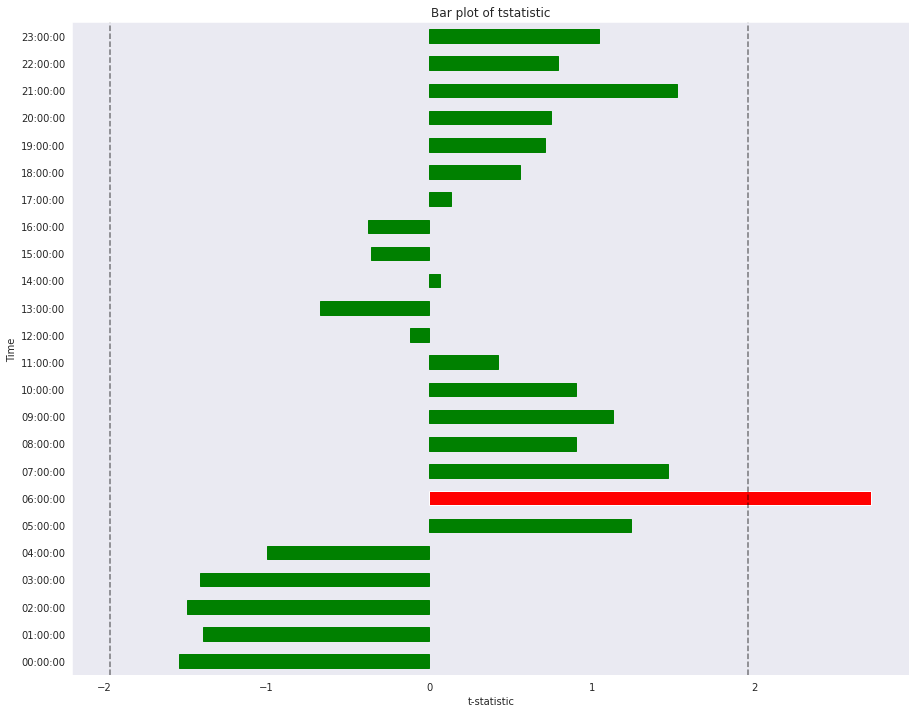

In [ ]:
#Let's plot the "statistic" column
plt.figure(figsize=(15,12))
ax=ttestvals['statistic'].plot(kind='barh',color='red',ax=plt.gca())
plt.locator_params(axis='y', nbins=40)
plt.locator_params(axis='x', nbins=10)
plt.xlabel('t-statistic')
plt.axvline(x=1.96,alpha=0.5,color='black',linestyle='--')
plt.axvline(x=-1.96,alpha=0.5,color='black',linestyle='--')

for rect in ax.patches:
    if(abs(rect.get_width())<1.96):
        rect.set_color('green')
_=plt.title('Bar plot of tstatistic')

According to the diagram Only one group of data i.e. for 06:00 AM is rejected (because 2.719637 > 1.96) which is shown in red color and the remaining all are accepted (because all values are less than 1.96) which are shown in green colour.

**`P-value V/s Time plot`**

If p-value is greater than 0.05 then we accept the null hypothesis otherwise reject it.

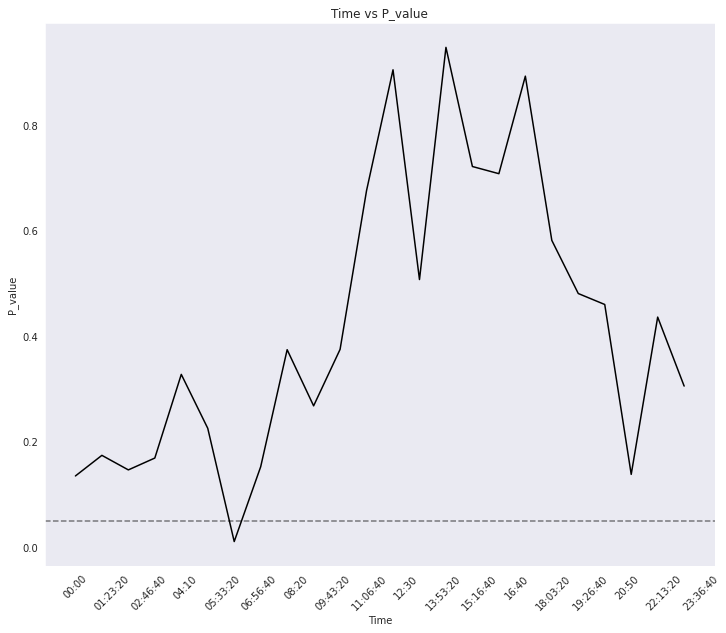

In [ ]:
plt.figure(figsize=(12,10))
ax=ttestvals['pvalue'].plot(kind='line',color='black',ax=plt.gca())
plt.axhline(y=0.05,alpha=0.5,color='black',linestyle='--')
plt.locator_params(axis='x',nbins=20)
for item in plt.gca().get_xticklabels():
    item.set_rotation(45)

_=plt.title('Time vs P_value')
_=plt.ylabel('P_value')

In the above plot, only one value is less than 0.05 (which is from 06:00 AM) which is rejected and all the remaining are accepted.

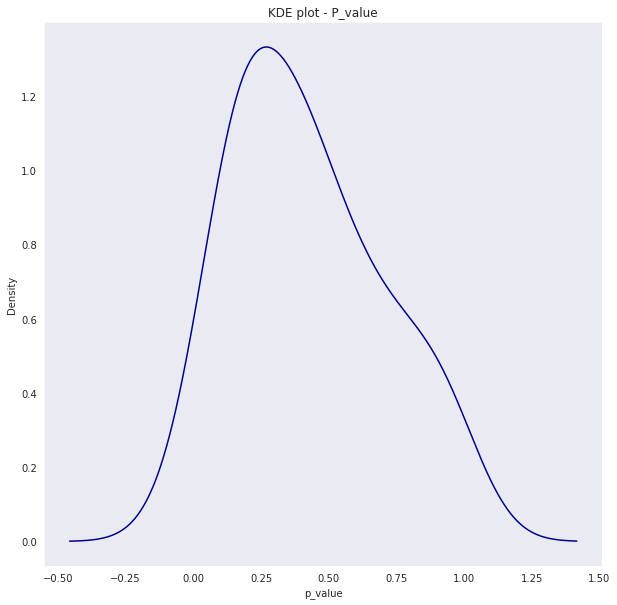

In [ ]:
#KDE plot
plt.figure(figsize=(10,10))
ttestvals['pvalue'].plot(kind='kde',color='darkblue',ax=plt.gca())
plt.title('KDE plot - P_value')
_=plt.xlabel('p_value')

In [ ]:
data.head(10)

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,BinnedHour,Day,Date,Time
0,252581,7C,6A,2014-09-01 09:00:00,4.25,00:15:11,2014-09-01 09:00:00,Monday,2014-09-01,09:00:00
1,252582,7B,15,2014-09-01 18:00:00,10.17,00:34:05,2014-09-01 18:00:00,Monday,2014-09-01,18:00:00
2,252583,11,2A,2014-09-01 17:00:00,4.02,00:17:06,2014-09-01 17:00:00,Monday,2014-09-01,17:00:00
3,252584,3B,4A,2014-09-01 13:00:00,1.46,00:06:32,2014-09-01 13:00:00,Monday,2014-09-01,13:00:00
4,252585,2A,10,2014-09-01 14:00:00,8.31,00:26:17,2014-09-01 14:00:00,Monday,2014-09-01,14:00:00
5,252586,5B,4C,2014-09-01 12:00:00,1.04,00:08:35,2014-09-01 12:00:00,Monday,2014-09-01,12:00:00
6,252587,10,10,2014-09-01 14:00:00,1.44,00:19:36,2014-09-01 14:00:00,Monday,2014-09-01,14:00:00
7,252588,2A,7A,2014-09-01 03:00:00,5.08,00:18:17,2014-09-01 03:00:00,Monday,2014-09-01,03:00:00
8,252589,2B,3C,2014-09-01 11:00:00,1.64,00:07:29,2014-09-01 11:00:00,Monday,2014-09-01,11:00:00
9,252590,9,5B,2014-09-01 20:00:00,16.63,00:28:37,2014-09-01 20:00:00,Monday,2014-09-01,20:00:00


# **`Thank You!`**